 ## 彩色图像的频域滤波器

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import data, color
from PIL import Image
%matplotlib inline

def GaussLowPassFiltering(f_shift, r=50):  
    # 初始化  
    m = f_shift.shape[0]  
    n = f_shift.shape[1]  
    h1 = np.zeros((m, n))  
    x0 = np.floor(m/2)  
    y0 = np.floor(n/2)  
    for i in range(m):  
        for j in range(n):  
            D = np.sqrt((i - x0)**2 + (j - y0)**2)  
            h1[i][j] = np.exp((-1)*D**2/2/(r**2))  
    result = np.multiply(f_shift, h1)  
    return result  

# 中文显示工具函数
def set_ch():
    from pylab import mpl
    mpl.rcParams['font.sans-serif'] = ['FangSong']
    mpl.rcParams['axes.unicode_minus'] = False
    

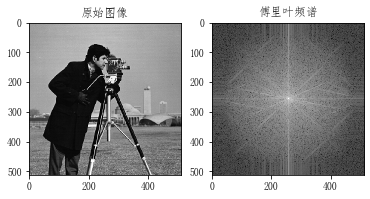

In [16]:
# 将空域转化为频域
set_ch()
img = data.camera()
# 快速傅里叶变换得到频率分布
f = np.fft.fft2(img)
# 默认结果中心点的位置是左上角，转移到中间位置
fshift = np.fft.fftshift(f)
# fft结果是复数，求绝对值结果才是振幅
fimg = np.log(np.abs(fshift))
# 展示结果
plt.subplot(1, 2, 1), plt.imshow(img, 'gray'), plt.title('原始图像')
plt.subplot(1, 2, 2), plt.imshow(fimg, 'gray'), plt.title('傅里叶频谱')
plt.show()

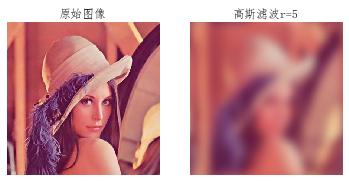

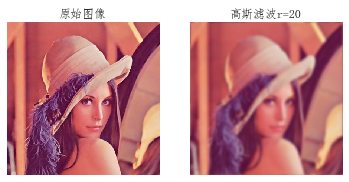

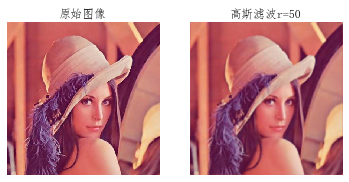

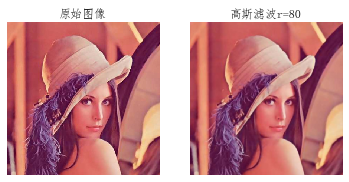

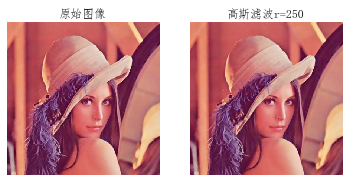

<Figure size 432x288 with 0 Axes>

In [22]:
set_ch()
lena_src = np.array(Image.open(r'E:\digital_image_process\color_images\Lena.jpg'))

def compute_filter(img, radius=50):
    ret_img = np.zeros(img.shape, dtype='uint8')
    fchannels = []
    tmp = np.zeros((img.shape[0],img.shape[1]),dtype=img.dtype)
    for i in range(img.shape[-1]):
        tmp[:,:] = img[:,:,i]
        img_dft = np.fft.fft2(tmp)
        img_dft_shift = np.fft.fftshift(img_dft)
        # 计算滤波结果
        fshift = GaussLowPassFiltering(img_dft_shift, r=radius)
        # 逆傅里叶变换
        f_ishift = np.fft.ifftshift(fshift)
        img_back = np.fft.ifft2(f_ishift)
        # 出来的是负数形式
        #取绝对值：将复数变化成实数
        img_back = np.uint8(np.abs(img_back))
        fchannels.append(img_back)
    ret_img = cv2.merge(fchannels)
    return ret_img

r_s = [5, 20, 50, 80, 250]
for r in r_s:
    result = compute_filter(lena_src, radius=r)
    plt.subplot(1, 2, 1), plt.axis('off'), plt.imshow(lena_src), plt.title('原始图像')
    plt.subplot(1, 2, 2), plt.axis('off'),plt.imshow(result), plt.title('高斯滤波r='+ str(r))
    plt.show()
    plt.savefig(r"E:\digital_image_process\experiment_1\work1_result\高斯低通滤波r_" + str(r) + ".jpg")